In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error,mean_absolute_error, mean_absolute_percentage_error
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import warnings
warnings.filterwarnings('ignore')
import itertools

In [2]:
df=pd.read_csv('product k.csv', parse_dates=['Month-Year'], index_col='Month-Year')

In [3]:
df.head(15)

,Product Name,Product Category,Month,Year,Sales,Market Size,Marketing Expense,Month No.
Month-Year,,,,,,,,
2019-01-01,Product K,Multivitamin,January,2019,505010,797644,8355561,1
2019-02-01,Product K,Multivitamin,February,2019,521132,823109,8622305,2
2019-03-01,Product K,Multivitamin,March,2019,580897,917505,9611137,3
2019-04-01,Product K,Multivitamin,April,2019,612559,967514,10134996,4
2019-05-01,Product K,Multivitamin,May,2019,550697,869805,9111468,5
2019-06-01,Product K,Multivitamin,June,2019,552137,872080,9135293,6
2019-07-01,Product K,Multivitamin,July,2019,489712,773482,8102450,7
2019-08-01,Product K,Multivitamin,August,2019,597098,943094,9879188,8
2019-09-01,Product K,Multivitamin,September,2019,621078,980970,10275945,9


In [4]:
sales_k= df.drop(['Product Name','Product Category','Month','Year','Month No.'],axis=1)

In [5]:
sales_k.shape

(60, 3)

In [6]:
sales_k.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 60 entries, 2019-01-01 to 2023-12-01
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Sales              60 non-null     int64
 1   Market Size        60 non-null     int64
 2   Marketing Expense  60 non-null     int64
dtypes: int64(3)
memory usage: 1.9 KB


In [7]:
print('Total Sales:', sales_k['Sales'].sum())
print('Total Market Size:',sales_k['Market Size'].sum())
print('Total Marketing Expense:', sales_k['Marketing Expense'].sum())

Total Sales: 32299304
Total Market Size: 71977388
Total Marketing Expense: 279528743


Text(0.5, 1.0, 'Product K')

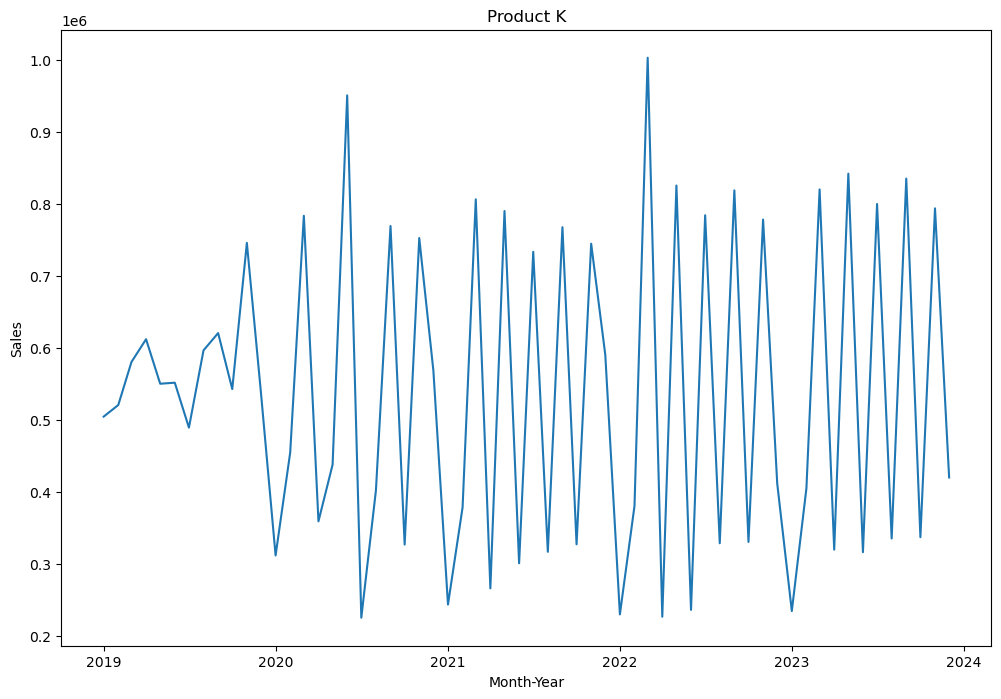

In [8]:
plt.figure(figsize=(12,8))
sns.lineplot(sales_k['Sales'])
plt.title('Product K')

In [9]:
from statsmodels.tsa.stattools import adfuller

In [10]:
def adf_test(series):
    result=adfuller(series)
    print('ADF Statistics: {}'.format(result[0]))
    print('p- value: {}'.format(result[1]))
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [11]:
adf_test(sales_k['Sales'])

ADF Statistics: -4.339743021722731
p- value: 0.0003788479952270515
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


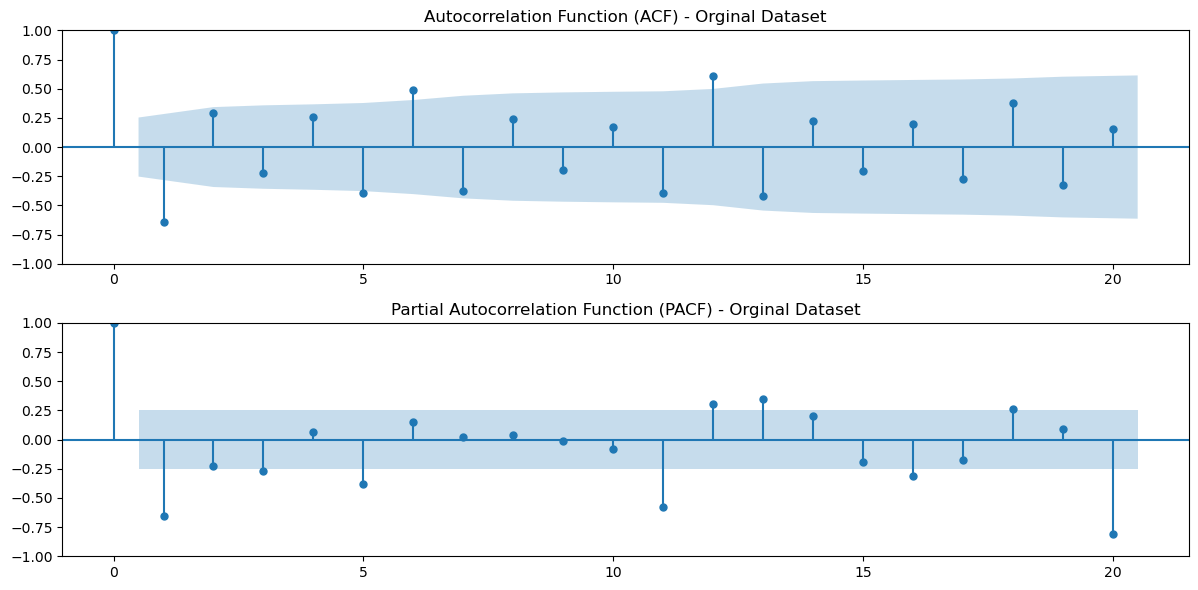

In [12]:
# Plot ACF and PACF
plt.figure(figsize=(12, 6))
plt.subplot(211)
plot_acf(sales_k['Sales'], lags=20, ax=plt.gca())
plt.title('Autocorrelation Function (ACF) - Orginal Dataset')

plt.subplot(212)
plot_pacf(sales_k['Sales'], lags=20, ax=plt.gca())
plt.title('Partial Autocorrelation Function (PACF) - Orginal Dataset')

plt.tight_layout()
plt.show()

In [13]:
train= sales_k[:57]
test=sales_k[57:]

In [14]:
len(train)

57

In [15]:
#Finding the best value for ARIMA

#import itertools
#p=d=q=range(0,5)
#pdq = list(itertools.product(p,d,q))

#for param in pdq:
#    try:
#        model_arima = ARIMA(train,order=param)
#        model_arima_fit = model_arima.fit()
#       print(param,model_arima_fit.aic)
#    except:
#        continue
    
# The Akaike information criterion (AIC) is an estimator of in-sample prediction error and thereby relative quality of
# statistical models for a given set of data

# It's like the mean squared error in Regression - The smaller the number, the better

In [16]:
#therefore, the combination p=(0,1,2,3,4,5) d=1 q=(0,1,2,3) must be tested with accuracy metrics and aic

In [17]:
#param = [(0,1,0),(0,1,1),(0,1,2),(0,1,3),(1,1,0),(1,1,1),(1,1,2),(1,1,3),(2,1,0), (2,1,1), (2,1,2),(2,1,3),(3,1,0),(3,1,1),(3,1,2),(3,1,3),(4,1,0),(4,1,1),(4,1,2),(4,1,3),(5,1,0),(5,1,1),(5,1,2),(5,1,3)]

#for p in param:  # Changed 'x' to 'p'
#    model = ARIMA(train, order=p).fit()
#    pred = model.forecast(steps=len(test))
#    mae = mean_absolute_error(test, pred)
#    mape = np.mean(np.abs((test - pred) / test)) * 100
#    mse=mean_squared_error(test, pred)
#    rmse = np.sqrt(mean_squared_error(test, pred))
#    print(p)
#    print(f'MAE: {mae}')
#    print(f'MSE: {mse}')
#    print(f'RMSE: {rmse}')
#    print('A.I.C:', model.aic)

In [18]:
order=[]
for p in range(6):
    # Loop over MA order
    for q in range(4):
        # Fit model        
#       model= ARIMA(sales_b, order=(p,1,q))
        model_t = ARIMA(train['Sales'], order=(p,0,q), exog=train[['Market Size','Marketing Expense']])
        model_test=model_t.fit() 
        pred=model_test.predict(start=len(train), end=(len(sales_k)-1), exog=test[['Market Size','Marketing Expense']])
        mae = mean_absolute_error(test['Sales'], pred)
        mape = np.mean(np.abs((test['Sales'] - pred) / test)) * 100
        mse=mean_squared_error(test['Sales'], pred)
        rmse = np.sqrt(mean_squared_error(test['Sales'], pred))
        # Add order and scores to list        
        order.append((p, q, model_test.aic, model_test.bic,mae, mse, rmse))
#Make DataFrame of model order and AIC/BIC scores
order_df = pd.DataFrame(order, columns=['p','q', 'aic', 'bic', 'mae','mse', 'rmse'])

In [19]:
# Sort by AIC
print(order_df.sort_values('aic'))

    p  q          aic          bic            mae           mse           rmse
18  4  2  1499.668845  1520.099358  200647.678848  4.811330e+10  219347.447780
1   0  1  1500.531988  1510.747245  268200.694680  1.044591e+11  323201.307587
8   2  0  1500.862082  1513.120389  271437.468783  1.069790e+11  327076.424182
5   1  1  1502.506818  1514.765126  268013.144118  1.042455e+11  322870.721747
12  3  0  1502.793970  1517.095329  271690.975050  1.068497e+11  326878.744457
9   2  1  1502.900306  1517.201665  271682.688089  1.070046e+11  327115.500074
2   0  2  1502.993934  1515.252241  267800.812985  1.040009e+11  322491.738526
3   0  3  1503.357771  1517.659130  270353.819484  1.050264e+11  324077.741440
4   1  0  1504.021753  1514.237009  262923.972438  9.921696e+10  314987.241333
16  4  0  1504.408504  1520.752914  269152.441904  1.035494e+11  321790.912586
15  3  3  1504.673492  1525.104005  239349.591189  6.842652e+10  261584.639294
7   1  3  1504.739352  1521.083763  270932.231149  1

In [20]:
m_arima= ARIMA(train['Sales'], order=(4,0,2), exog=train[['Market Size','Marketing Expense']])
model_arima=m_arima.fit()
print(model_arima.summary())

                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                   57
Model:                 ARIMA(4, 0, 2)   Log Likelihood                -739.834
Date:                Thu, 09 May 2024   AIC                           1499.669
Time:                        19:56:22   BIC                           1520.099
Sample:                    01-01-2019   HQIC                          1507.609
                         - 09-01-2023                                         
Covariance Type:                  opg                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1.107e+05   3.57e-07    3.1e+11      0.000    1.11e+05    1.11e+05
Market Size           0.2099      0.033      6.359      0.000       0.145       0.275
Marketing Expense     0.

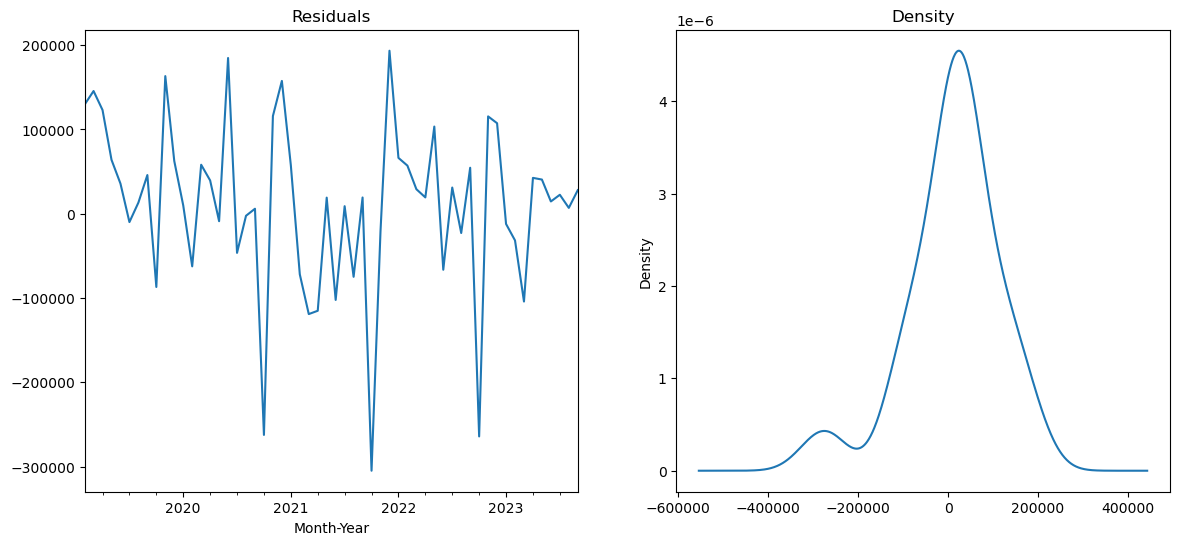

In [21]:
residuals= model_arima.resid[1:]
fig,ax=plt.subplots(1,2, figsize=(14, 6))
residuals.plot(title='Residuals',ax=ax[0])
residuals.plot(title='Density',kind='kde',ax=ax[1])
plt.show()

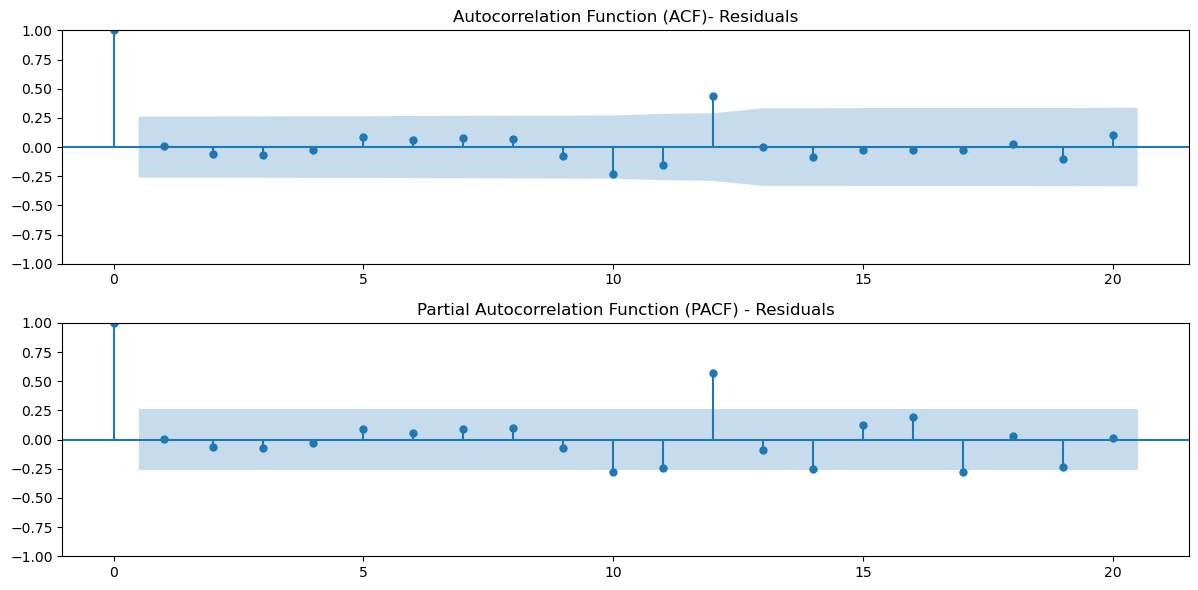

In [22]:
# Plot ACF and PACF
plt.figure(figsize=(12, 6))
plt.subplot(211)
plot_acf(residuals, lags=20, ax=plt.gca())
plt.title('Autocorrelation Function (ACF)- Residuals')

plt.subplot(212)
plot_pacf(residuals, lags=20, ax=plt.gca())
plt.title('Partial Autocorrelation Function (PACF) - Residuals')

plt.tight_layout()
plt.show()

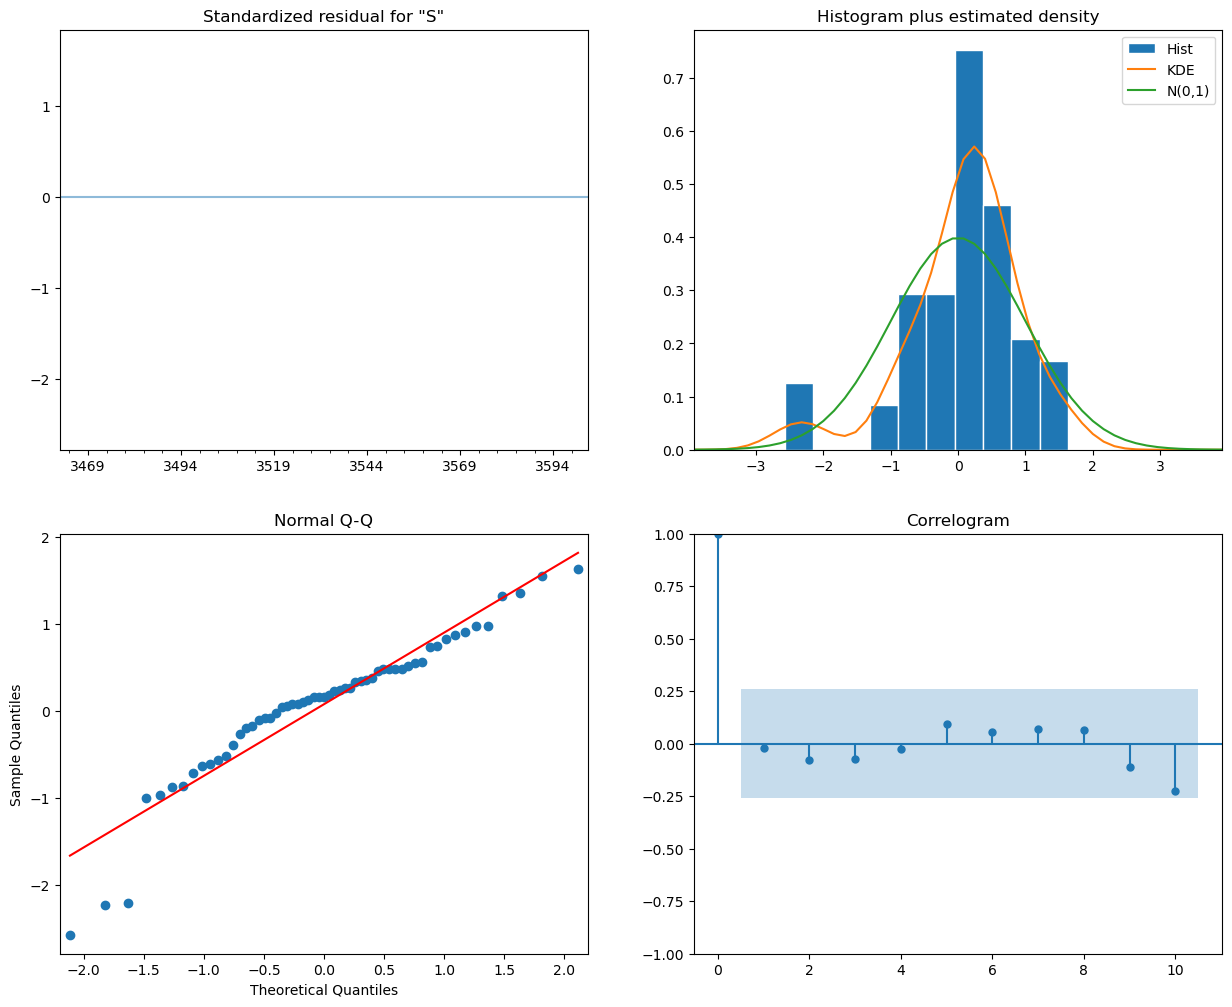

In [23]:
# Create the 4 diagostics plots
model_arima.plot_diagnostics(figsize=(15, 12))
plt.show()

In [24]:
#pred_in_sample = model_arima.get_prediction(start=len(train), end=(len(sales_b)-1))
#sales_b['Forecast_ARIMA_p']=[None]*len(train) + list(pred)

In [25]:
#plt.figure(figsize=(12, 8))
#sns.lineplot(sales_b[['Sales','Forecast_ARIMA_p']])
#plt.title('Product B')
#plt.show()

In [26]:
pred=model_arima.predict(start=len(train), end=(len(sales_k)-1), exog=test[['Market Size','Marketing Expense']], dynamic = True)
sales_k['Forecast_ARIMAX']=[None]*len(train) + list(pred)
#sales_b.plot()

In [27]:
#pred=model_arima.forecast(steps= len(test))
#sales_b['Forecast_ARIMA']=[None]*len(train) + list(pred)
#sales_b.plot()

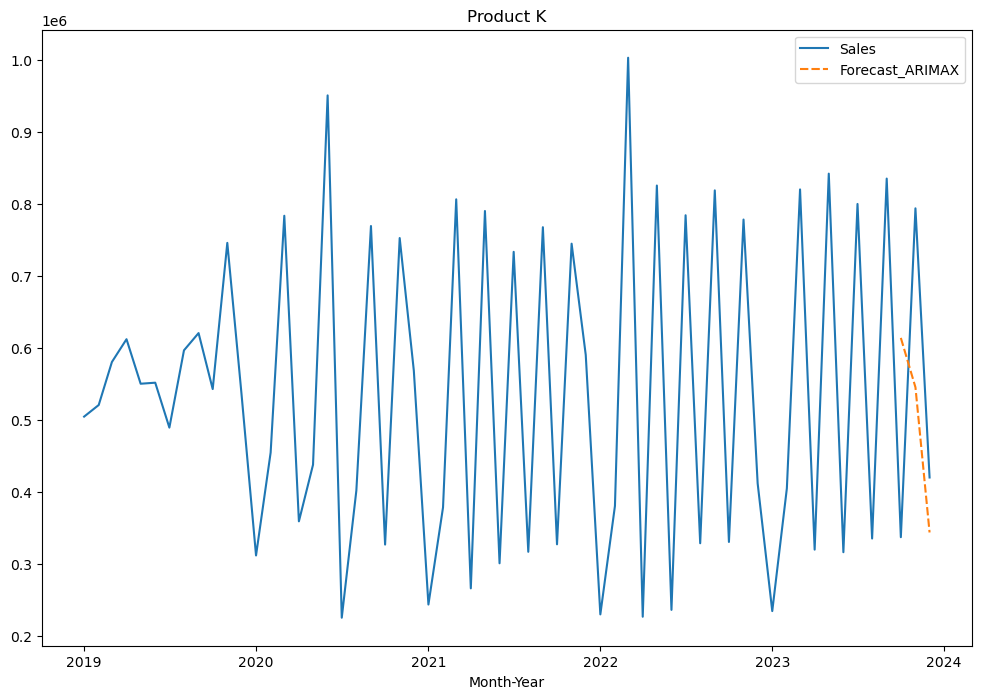

In [28]:
plt.figure(figsize=(12, 8))
sns.lineplot(sales_k[['Sales','Forecast_ARIMAX']])
plt.title('Product K')
plt.show()

In [29]:
mae_arimax= mean_absolute_error(test['Sales'],pred)
mse_arimax=mean_squared_error(test['Sales'], pred)
mape_arimax= mean_absolute_percentage_error(test['Sales'],pred)
rmse_arimax= np.sqrt(mean_squared_error(test['Sales'],pred))

print(f'MAE - ARIMAX: {mae_arimax}')
print(f'MAPE - ARIMAX: {mape_arimax}')
print(f'MSE - ARIMAX: {mse_arimax}')
print(f'RMSE - ARIMAX: {rmse_arimax}')

MAE - ARIMAX: 200647.67884826896
MAPE - ARIMAX: 0.43841979173617984
MSE - ARIMAX: 48113302847.440254
RMSE - ARIMAX: 219347.44777963625


# SARIMA

In [30]:
import statsmodels.api as sm

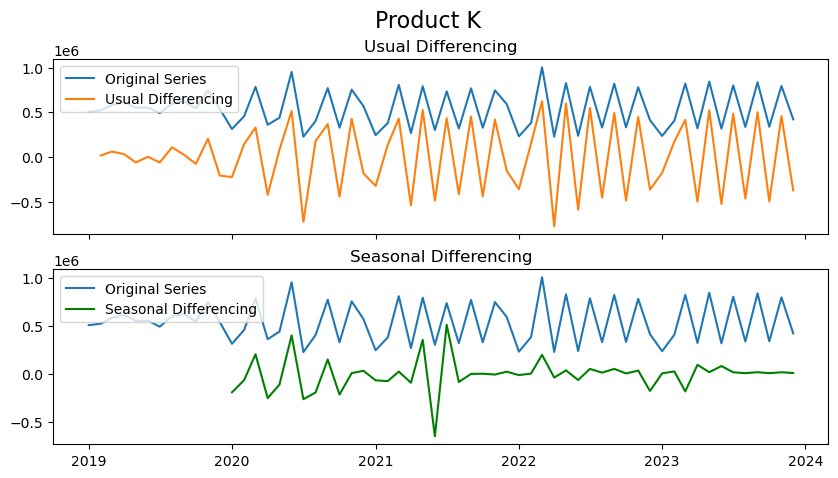

In [31]:
# Plot
fig, axes = plt.subplots(2, 1, figsize=(10,5), dpi=100, sharex=True)

# Usual Differencing
axes[0].plot(sales_k['Sales'], label='Original Series')
axes[0].plot(sales_k['Sales'].diff(1), label='Usual Differencing')
axes[0].set_title('Usual Differencing')
axes[0].legend(loc='upper left', fontsize=10)


# Seasinal Dei
axes[1].plot(sales_k['Sales'], label='Original Series')
axes[1].plot(sales_k['Sales'].diff(12), label='Seasonal Differencing', color='green')
axes[1].set_title('Seasonal Differencing')
plt.legend(loc='upper left', fontsize=10)
plt.suptitle('Product K', fontsize=16)
plt.show()

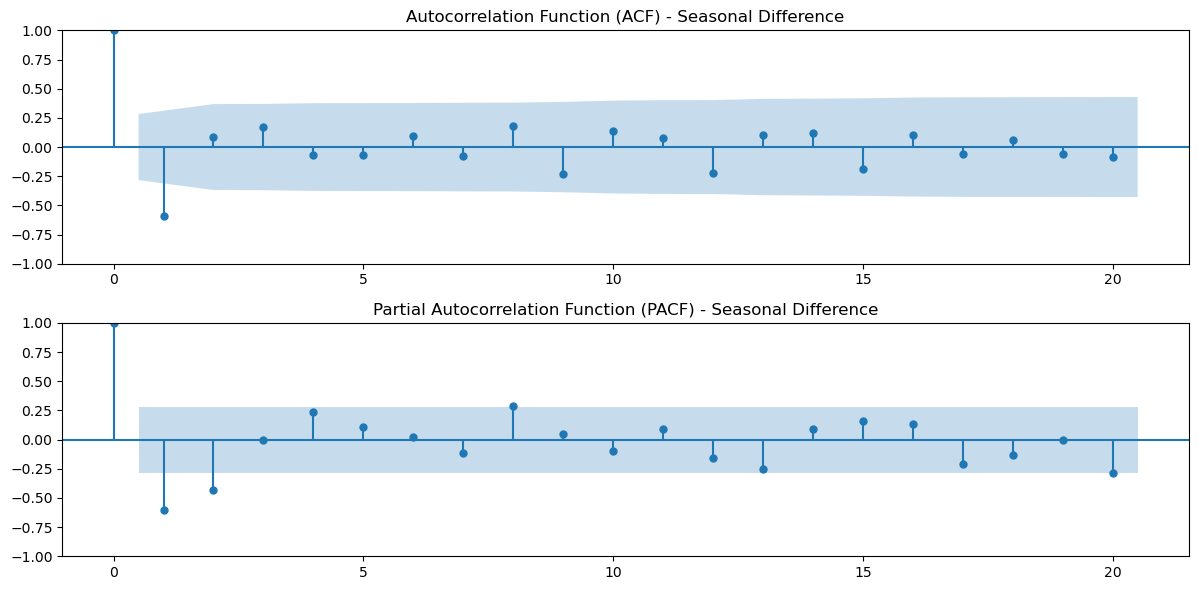

In [32]:
# Plot ACF and PACF
plt.figure(figsize=(12, 6))
plt.subplot(211)
plot_acf(sales_k['Sales'].diff(12).dropna(), lags=20, ax=plt.gca())
plt.title('Autocorrelation Function (ACF) - Seasonal Difference')

plt.subplot(212)
plot_pacf(sales_k['Sales'].diff(12).dropna(), lags=20, ax=plt.gca())
plt.title('Partial Autocorrelation Function (PACF) - Seasonal Difference')

plt.tight_layout()
plt.show()

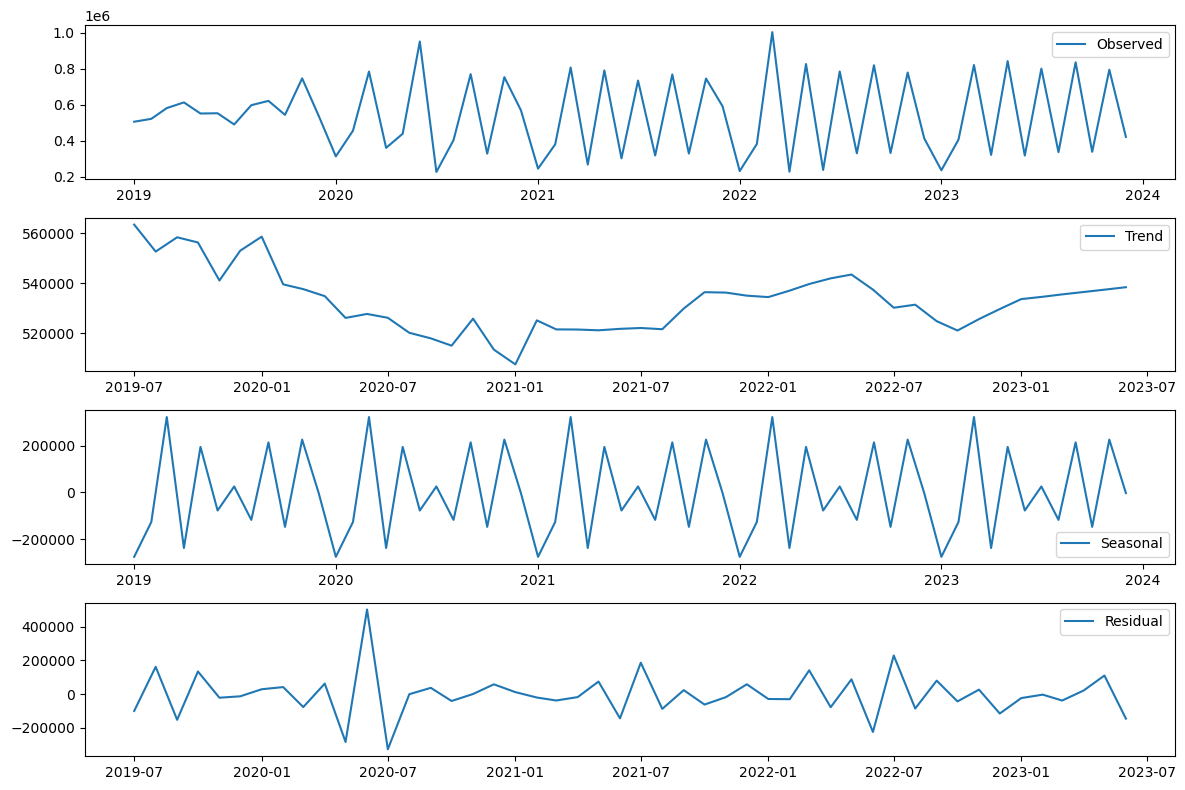

In [33]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Perform seasonal decomposition
decomposition = seasonal_decompose(sales_k['Sales'], model='additive', period=12)

# Plot the decomposition
#fig = decomposition.plot(figsize=(12,8))
#plt.show()
# Create a new figure with the specified size
plt.figure(figsize=(12, 8))

# Plot each component separately
plt.subplot(411)
plt.plot(decomposition.observed, label='Observed')
plt.legend()

plt.subplot(412)
plt.plot(decomposition.trend, label='Trend')
plt.legend()

plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonal')
plt.legend()

plt.subplot(414)
plt.plot(decomposition.resid, label='Residual')
plt.legend()

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

In [34]:
order_SARIMAX=[]
# Loop over P order
for P in range(4):
    # Loop over Q order
    for Q in range(2):
        # Fit model
        model_s = sm.tsa.statespace.SARIMAX(train['Sales'], order=(4, 0, 2), seasonal_order=(P, 1, Q, 12),exog=train[['Market Size','Marketing Expense']])
        model_test_s = model_s.fit() 
        pred = model_test_s.predict(start=57, end=59, dynamic=True, exog=test[['Market Size','Marketing Expense']])
        mae = mean_absolute_error(test['Sales'], pred)
        mse = mean_squared_error(test['Sales'], pred)
        # Add order and scores to list        
        order_SARIMAX.append((P, Q, model_test_s.aic, model_test_s.bic, mae, mse))

# Make DataFrame of model order and scores
order_SARIMAX_df = pd.DataFrame(order_SARIMAX, columns=['P', 'Q', 'aic', 'bic', 'mae', 'mse'])


In [35]:
# Sort by AIC
print(order_SARIMAX_df.sort_values('aic'))

   P  Q          aic          bic           mae           mse
4  2  0  1152.161985  1172.035272  35343.477331  1.875694e+09
5  2  1  1154.309434  1175.989383  14652.283578  2.641237e+08
7  3  1  1154.680923  1178.167535  26807.843246  1.131670e+09
0  0  0  1158.971185  1175.231148  10016.360168  2.420310e+08
3  1  1  1158.975163  1178.848450  27524.070281  8.873778e+08
1  0  1  1160.926092  1178.992717  15878.311042  3.236679e+08
2  1  0  1160.955262  1179.021887  11878.855808  2.594368e+08
6  3  0  1180.335262  1202.015212  57366.023107  3.447443e+09


In [36]:
sarima=sm.tsa.statespace.SARIMAX(train['Sales'],order=(4, 0, 2),seasonal_order=(2,1,0,12),exog=train[['Market Size','Marketing Expense']])
sarima_model=sarima.fit()
print(sarima_model.summary())

                                      SARIMAX Results                                      
Dep. Variable:                               Sales   No. Observations:                   57
Model:             SARIMAX(4, 0, 2)x(2, 1, [], 12)   Log Likelihood                -565.081
Date:                             Thu, 09 May 2024   AIC                           1152.162
Time:                                     19:58:43   BIC                           1172.035
Sample:                                 01-01-2019   HQIC                          1159.571
                                      - 09-01-2023                                         
Covariance Type:                               opg                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Market Size           0.2842      0.031      9.148      0.000       0.223       0.345
Market

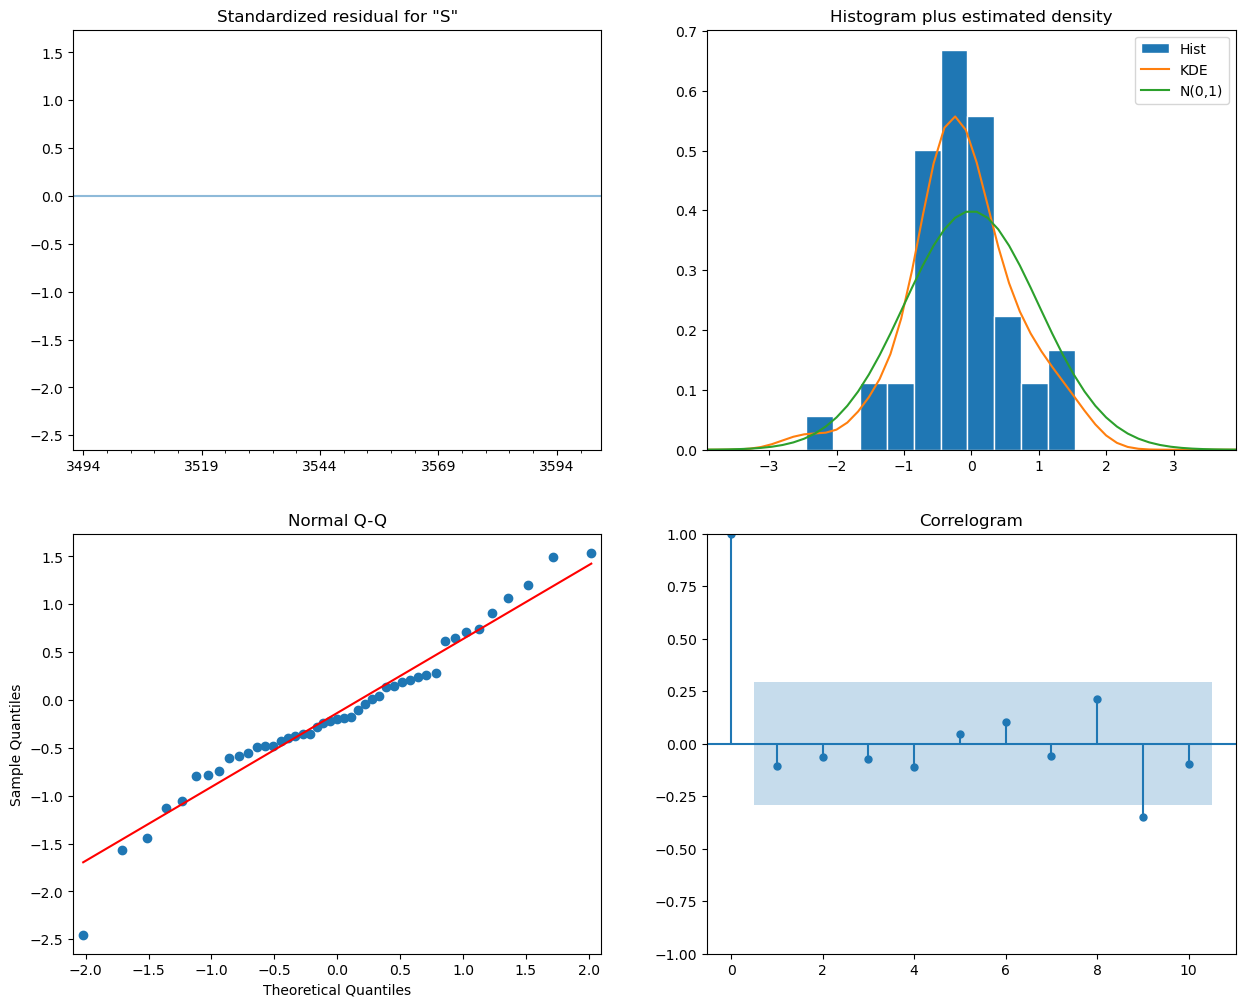

In [37]:
sarima_model.plot_diagnostics(figsize=(15, 12))
plt.show()

In [38]:
forecast_test_sarima=sarima_model.predict(start=57, end=59, dynamic=True, exog=test[['Market Size','Marketing Expense']])

In [39]:
sales_k['Forecast_SARIMAX']=[None]*len(train)+ list(forecast_test_sarima)
#sales_b[['Sales','Forecast_SARIMA']].plot(figsize=(12,8))

Text(0.5, 1.0, 'Product K')

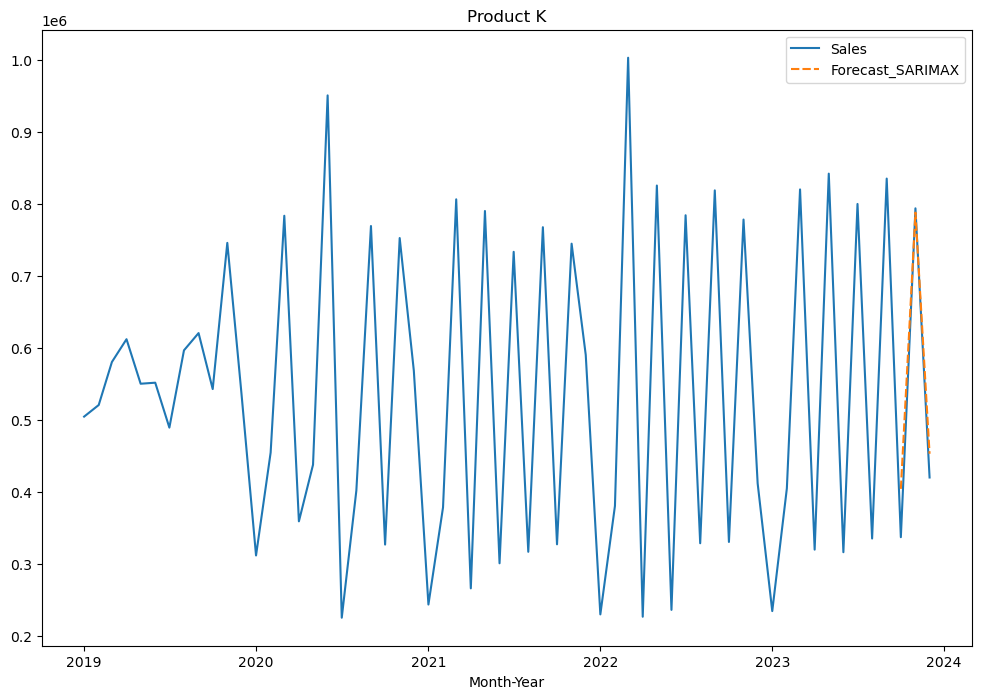

In [40]:
plt.figure(figsize=(12, 8))
sns.lineplot(sales_k[['Sales','Forecast_SARIMAX']])
plt.title('Product K')

In [41]:
mae_sarimax= mean_absolute_error(test['Sales'],forecast_test_sarima)
mape_sarimax= mean_absolute_percentage_error(test['Sales'],forecast_test_sarima)
mse_sarimax=mean_squared_error(test['Sales'], forecast_test_sarima)
rmse_sarimax= np.sqrt(mean_squared_error(test['Sales'],forecast_test_sarima))

print(f'MAE - SARIMAX: {round(mae_sarimax,3)}')
print(f'MAPE - SARIMAX: {round(mape_sarimax,3)}')
print(f'MSE - SARIMAX: {round(mse_sarimax,3)}')
print(f'RMSE - SARIMAX: {round(rmse_sarimax,3)}')

MAE - SARIMAX: 35343.477
MAPE - SARIMAX: 0.095
MSE - SARIMAX: 1875693808.754
RMSE - SARIMAX: 43309.281


# AUTO-ARIMA

In [42]:
import pmdarima as pm

In [43]:
auto_arima= pm.auto_arima(train['Sales'], start_p=0, d=0, start_q=0, max_p=6,max_q=3,
                          start_P=0, D=1, start_Q=0, max_P=4 ,max_Q=2 ,  
                          stepwise=False, trace=True,
                          seasonal=True,m=12, exogenous=train[['Market Size','Marketing Expense']])
auto_arima

 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=1220.820, Time=0.04 sec
 ARIMA(0,0,0)(0,1,1)[12] intercept   : AIC=1221.203, Time=0.10 sec
 ARIMA(0,0,0)(0,1,2)[12] intercept   : AIC=1223.184, Time=0.24 sec
 ARIMA(0,0,0)(1,1,0)[12] intercept   : AIC=1221.222, Time=0.09 sec
 ARIMA(0,0,0)(1,1,1)[12] intercept   : AIC=1223.202, Time=0.41 sec
 ARIMA(0,0,0)(1,1,2)[12] intercept   : AIC=inf, Time=0.97 sec
 ARIMA(0,0,0)(2,1,0)[12] intercept   : AIC=1223.100, Time=0.22 sec
 ARIMA(0,0,0)(2,1,1)[12] intercept   : AIC=1225.001, Time=0.37 sec
 ARIMA(0,0,0)(2,1,2)[12] intercept   : AIC=1226.976, Time=0.48 sec
 ARIMA(0,0,0)(3,1,0)[12] intercept   : AIC=1225.073, Time=1.41 sec
 ARIMA(0,0,0)(3,1,1)[12] intercept   : AIC=inf, Time=5.62 sec
 ARIMA(0,0,0)(3,1,2)[12] intercept   : AIC=inf, Time=5.27 sec
 ARIMA(0,0,0)(4,1,0)[12] intercept   : AIC=1226.973, Time=1.50 sec
 ARIMA(0,0,0)(4,1,1)[12] intercept   : AIC=inf, Time=7.27 sec
 ARIMA(0,0,1)(0,1,0)[12] intercept   : AIC=1208.178, Time=0.07 sec
 ARIMA(0,0,1)(0

ARIMA(order=(0, 0, 2), scoring_args={}, seasonal_order=(1, 1, 0, 12),
      suppress_warnings=True)

In [44]:
auto_arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                   57
Model:             SARIMAX(0, 0, 2)x(1, 1, [], 12)   Log Likelihood                -594.589
Date:                             Thu, 09 May 2024   AIC                           1199.179
Time:                                     20:00:56   BIC                           1208.212
Sample:                                 01-01-2019   HQIC                          1202.547
                                      - 09-01-2023                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept  -9150.1636   1.39e+04     -0.658      0.511   -3.64e+04    1.81e+04
ma.L1         -0.6681      0.076     -8.768      0.000      -0.817      -0.519
ma.L2          0.2951      0.061      4.826      0.000       0.175       0.415
ar.S.L12      -0.0831      0.038     -2.171      0.030      -0.158      -0.008
sigma2      1.473e+10      0.014   1.08e+12      0.000    1.47e+10    1.47e+10
===================================================================================
Ljung-Box (L1) (Q):                   3.76   Jarque-Bera (JB):                 4.99
Prob(Q):                              0.05   Prob(JB):                         0.08
Heteroskedasticity (H):               0.30   Skew:                            -0.12
Prob(H) (two-sided):                  0.03   Kurtosis:                         4.61
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.58e+28. Standard errors may be unstable.
"""

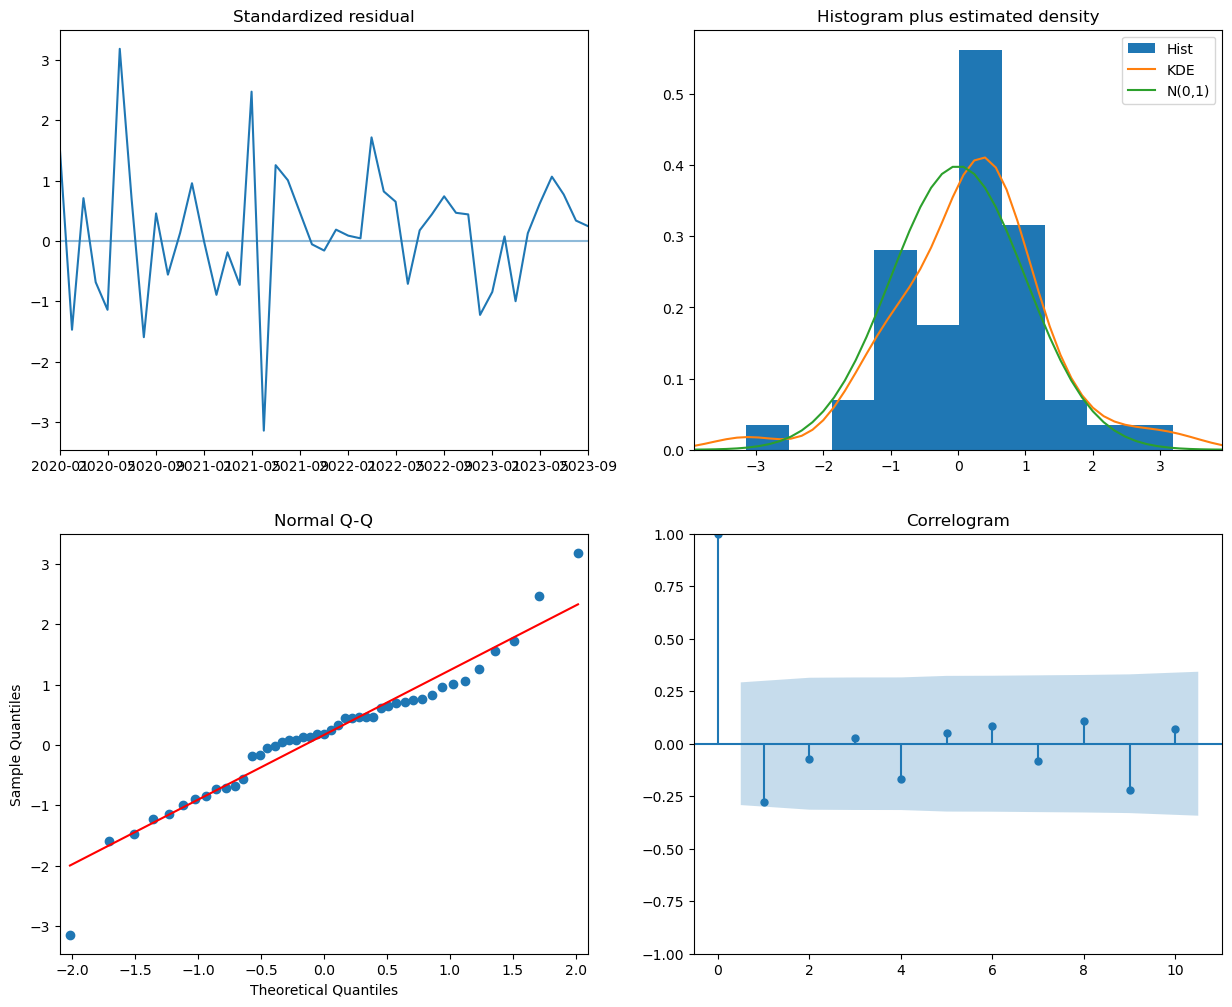

In [45]:
auto_arima.plot_diagnostics(figsize=(15, 12))
plt.show()

In [46]:
forecast_test_auto= auto_arima.predict(n_periods=len(test), exogenous=test[['Market Size','Marketing Expense']])
sales_k['Forecast_AUTO ARIMAX']=[None]*len(train)+ list(forecast_test_auto)
#sales_b[['Sales','Forecast_AUTO ARIMA']].plot()

Text(0.5, 1.0, 'Product K')

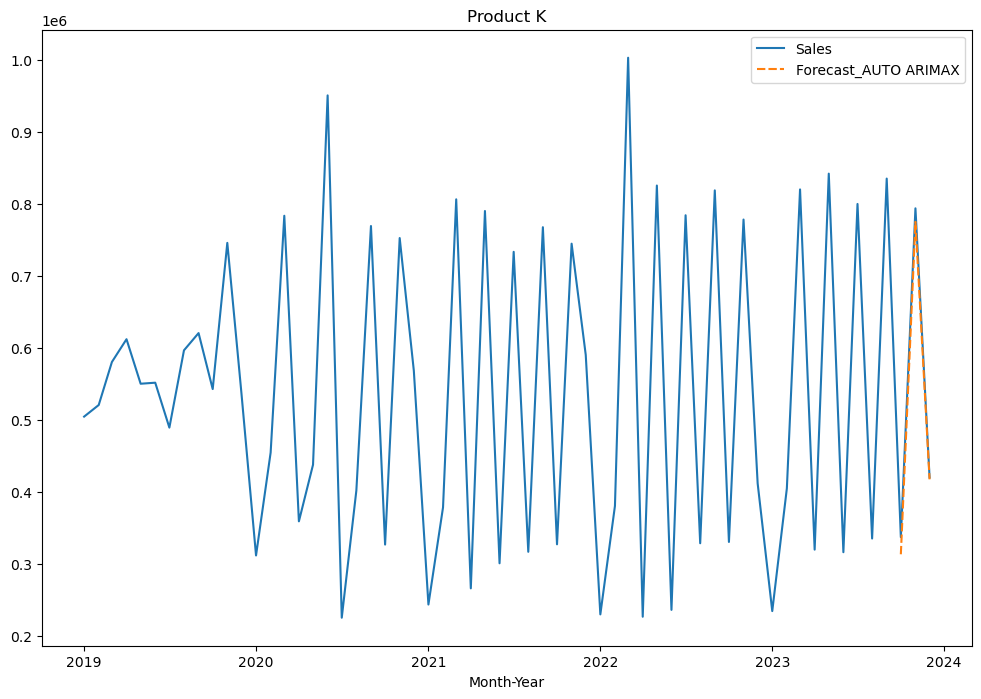

In [47]:
plt.figure(figsize=(12, 8))
sns.lineplot(sales_k[['Sales','Forecast_AUTO ARIMAX']])
plt.title('Product K')

In [48]:
mae_auto_arimax= mean_absolute_error(test['Sales'],forecast_test_auto)
mape_auto_arimax= mean_absolute_percentage_error(test['Sales'],forecast_test_auto)
mse_auto_arimax=mean_squared_error(test['Sales'],forecast_test_auto)
rmse_auto_arimax= np.sqrt(mean_squared_error(test['Sales'],forecast_test_auto))

print(f'MAE - AUTO ARIMAX: {mae_auto_arimax}')
print(f'MAPE - AUTO ARIMAX: {mape_auto_arimax}')
print(f'MSE - AUTO ARIMAX: {mse_auto_arimax}')
print(f'RMSE - AUTO ARIMAX: {rmse_auto_arimax}')

MAE - AUTO ARIMAX: 15021.995733983815
MAPE - AUTO ARIMAX: 0.033347865393015194
MSE - AUTO ARIMAX: 307464391.96834123
RMSE - AUTO ARIMAX: 17534.662584958434


In [49]:
sales_k.tail(12)

,Sales,Market Size,Marketing Expense,Forecast_ARIMAX,Forecast_SARIMAX,Forecast_AUTO ARIMAX
Month-Year,,,,,,
2023-01-01,234804,558252,2201850,NaN,NaN,NaN
2023-02-01,405296,963600,3800621,NaN,NaN,NaN
2023-03-01,820679,1951182,7695831,NaN,NaN,NaN
2023-04-01,320174,761221,3002398,NaN,NaN,NaN
2023-05-01,842609,2003321,7901477,NaN,NaN,NaN
2023-06-01,316593,752707,2968817,NaN,NaN,NaN
2023-07-01,800485,1903171,7506464,NaN,NaN,NaN
2023-08-01,335618,797939,3147222,NaN,NaN,NaN
2023-09-01,835745,1987002,7837111,NaN,NaN,NaN


In [50]:
sales_k.mean()

Sales                   5.383217e+05
Market Size             1.199623e+06
Marketing Expense       4.658812e+06
Forecast_ARIMAX         5.013924e+05
Forecast_SARIMAX        5.488086e+05
Forecast_AUTO ARIMAX    5.024083e+05
dtype: float64

In [51]:
data = {
    'model': ['ARIMAX', 'AUTO ARIMAX', 'SEASONAL ARIMAX'],
    'MAE': [mae_arimax, mae_auto_arimax, mae_sarimax],  
    'MAPE': [mape_arimax, mape_auto_arimax, mape_sarimax],  
    'MSE': [mse_arimax, mse_auto_arimax, mse_sarimax],  
    'RMSE': [rmse_arimax, rmse_auto_arimax, rmse_sarimax]  
}

model_results = pd.DataFrame(data)
model_results.set_index('model', inplace=True)
model_results

,MAE,MAPE,MSE,RMSE
model,,,,
ARIMAX,200647.678848,0.438420,4.811330e+10,219347.447780
AUTO ARIMAX,15021.995734,0.033348,3.074644e+08,17534.662585
SEASONAL ARIMAX,35343.477331,0.094930,1.875694e+09,43309.280862


# TESTING

In [16]:
auto_arima_1= pm.auto_arima(train['Sales'], start_p=0, start_q=0, max_p=5,max_q=3,
                          start_P=0, start_Q=0, max_P=2 ,max_Q=2 ,  
                          stepwise=False, trace=True,
                          seasonal=True,m=12, exogenous=train[['Market Size','Marketing Expense']])
auto_arima_1


 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=1220.820, Time=0.04 sec
 ARIMA(0,0,0)(0,1,1)[12] intercept   : AIC=1221.203, Time=0.06 sec
 ARIMA(0,0,0)(0,1,2)[12] intercept   : AIC=1223.184, Time=0.27 sec
 ARIMA(0,0,0)(1,1,0)[12] intercept   : AIC=1221.222, Time=0.08 sec
 ARIMA(0,0,0)(1,1,1)[12] intercept   : AIC=1223.202, Time=0.39 sec
 ARIMA(0,0,0)(1,1,2)[12] intercept   : AIC=inf, Time=0.89 sec
 ARIMA(0,0,0)(2,1,0)[12] intercept   : AIC=1223.100, Time=0.28 sec
 ARIMA(0,0,0)(2,1,1)[12] intercept   : AIC=1225.001, Time=0.54 sec
 ARIMA(0,0,0)(2,1,2)[12] intercept   : AIC=1226.976, Time=0.54 sec
 ARIMA(0,0,1)(0,1,0)[12] intercept   : AIC=1208.178, Time=0.07 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=1209.932, Time=0.24 sec
 ARIMA(0,0,1)(0,1,2)[12] intercept   : AIC=1211.632, Time=0.36 sec
 ARIMA(0,0,1)(1,1,0)[12] intercept   : AIC=1209.781, Time=0.14 sec
 ARIMA(0,0,1)(1,1,1)[12] intercept   : AIC=inf, Time=0.89 sec
 ARIMA(0,0,1)(1,1,2)[12] intercept   : AIC=inf, Time=1.22 sec
 ARIMA(0,0

ARIMA(order=(0, 0, 2), scoring_args={}, seasonal_order=(1, 1, 0, 12),
      suppress_warnings=True)

In [17]:
auto_arima_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                   57
Model:             SARIMAX(0, 0, 2)x(1, 1, [], 12)   Log Likelihood                -594.589
Date:                             Wed, 08 May 2024   AIC                           1199.179
Time:                                     20:34:23   BIC                           1208.212
Sample:                                 01-01-2019   HQIC                          1202.547
                                      - 09-01-2023                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept  -9150.1636   1.39e+04     -0.658      0.511   -3.64e+04    1.81e+04
ma.L1         -0.6681      0.076     -8.768      0.000      -0.817      -0.519
ma.L2          0.2951      0.061      4.826      0.000       0.175       0.415
ar.S.L12      -0.0831      0.038     -2.171      0.030      -0.158      -0.008
sigma2      1.473e+10      0.014   1.08e+12      0.000    1.47e+10    1.47e+10
===================================================================================
Ljung-Box (L1) (Q):                   3.76   Jarque-Bera (JB):                 4.99
Prob(Q):                              0.05   Prob(JB):                         0.08
Heteroskedasticity (H):               0.30   Skew:                            -0.12
Prob(H) (two-sided):                  0.03   Kurtosis:                         4.61
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.58e+28. Standard errors may be unstable.
"""

In [18]:
forecast_test_auto_1= auto_arima_1.predict(n_periods=len(test), exogenous=test[['Market Size','Marketing Expense']])
sales_k['Forecast_AUTO ARIMA_1']=[None]*len(train)+ list(forecast_test_auto_1)

Text(0.5, 1.0, 'Product K')

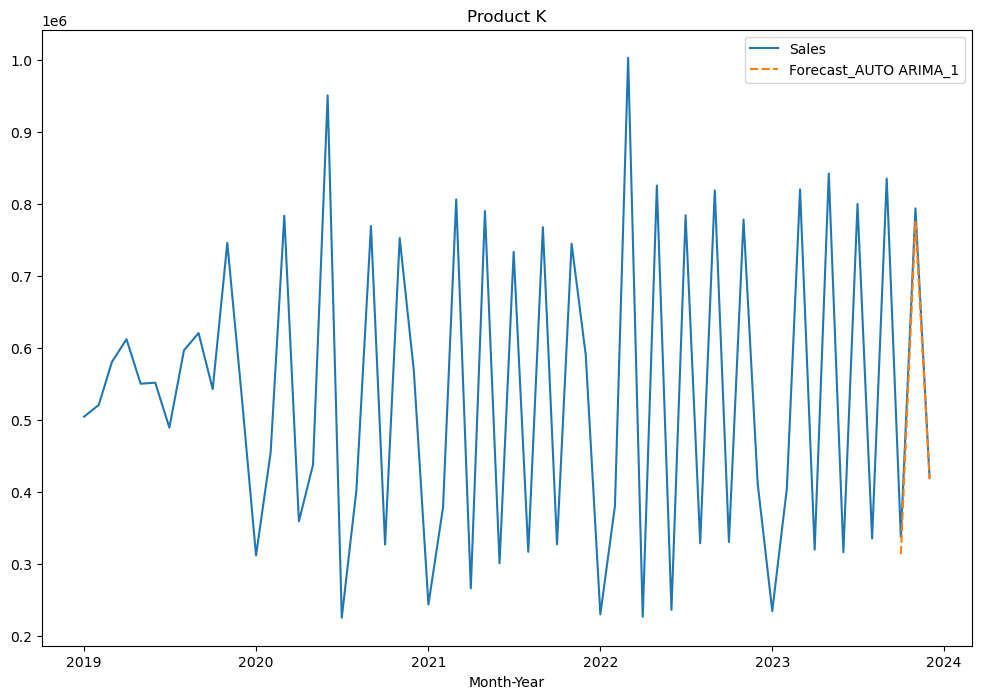

In [19]:
plt.figure(figsize=(12, 8))
sns.lineplot(sales_k[['Sales','Forecast_AUTO ARIMA_1']])
plt.title('Product K')

In [20]:
mae_auto_arima_1= mean_absolute_error(test['Sales'],forecast_test_auto_1)
mape_auto_arima_1= mean_absolute_percentage_error(test['Sales'],forecast_test_auto_1)
mse_auto_arima_1=mean_squared_error(test['Sales'],forecast_test_auto_1)
rmse_auto_arima_1= np.sqrt(mean_squared_error(test['Sales'],forecast_test_auto_1))

print(f'MAE - AUTO ARIMA: {mae_auto_arima_1}')
print(f'MAPE - AUTO ARIMA: {mape_auto_arima_1}')
print(f'MSE - AUTO ARIMA: {mse_auto_arima_1}')
print(f'RMSE - AUTO ARIMA: {rmse_auto_arima_1}')

MAE - AUTO ARIMA: 15021.995733983815
MAPE - AUTO ARIMA: 0.033347865393015194
MSE - AUTO ARIMA: 307464391.96834123
RMSE - AUTO ARIMA: 17534.662584958434
